# New Orleans - IndNola Bar and Grill

<p>The dataset "District_Name_data" has been uploaded in the platform to access the districts and neighborhoods of New Orleans.</p>

<p>Let's import necessary packages and read the data.</p>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude value

!conda install --yes lxml=4.3.0 python=3.6.7
import lxml.html as lh

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1  --> 2019.6.16-py36_1  conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.1.1c-h7b6447c_1 --> 1.1.1c-h516909a_0 conda-forge


certifi-2019.6.16    | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of cond

<p><b>Read</b> the dataset.</p>
<p>I have uploaded the dataset onto the platform for easy accessibility.</p>

In [2]:
df = pd.read_csv('District_Name_data.csv')
df.head()

,District_N,Name,Neighborhood,Latitude,Longitude
0,District 1a & 1b,French Quarter/CBD,French Quarter,29.959600,-90.063000
1,District 1a & 1b,French Quarter/CBD,Central Business District,29.948000,-90.072300
2,District 2,Central City/Garden District Area,Central City,29.942200,-90.086300
3,District 2,Central City/Garden District Area,East Riverside,29.920535,-90.089863
4,District 2,Central City/Garden District Area,Garden District,29.929200,-90.082900


### Exploratory Data Analysis

<p>Let's check the data statistics.</p>

In [3]:
df.describe(include = 'all')

,District_N,Name,Neighborhood,Latitude,Longitude
count,74,74,74,73.000000,73.000000
unique,13,13,74,NaN,NaN
top,District 4,Mid-City Area,St. Thomas Development,NaN,NaN
freq,12,12,1,NaN,NaN
mean,NaN,NaN,NaN,29.972371,-90.057579
std,NaN,NaN,NaN,0.040040,0.062395
min,NaN,NaN,NaN,29.907577,-90.134289
25%,NaN,NaN,NaN,29.939300,-90.095706
50%,NaN,NaN,NaN,29.969078,-90.072300
75%,NaN,NaN,NaN,30.000833,-90.034987


<p>Let's check for any missing values and remove them if they are irrelevant.</p>

In [4]:
df.isna().sum()

District_N      0
Name            0
Neighborhood    0
Latitude        1
Longitude       1
dtype: int64

<p>Since there's only one row that contains NaN value, it is wise to remove it from the data frame.</p>

In [5]:
df.dropna(subset = ['Latitude'], axis = 0, inplace = True)
print(df.isna().sum())

District_N      0
Name            0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64


In [6]:
df.head()

,District_N,Name,Neighborhood,Latitude,Longitude
0,District 1a & 1b,French Quarter/CBD,French Quarter,29.959600,-90.063000
1,District 1a & 1b,French Quarter/CBD,Central Business District,29.948000,-90.072300
2,District 2,Central City/Garden District Area,Central City,29.942200,-90.086300
3,District 2,Central City/Garden District Area,East Riverside,29.920535,-90.089863
4,District 2,Central City/Garden District Area,Garden District,29.929200,-90.082900


In [7]:
df.reset_index()

,index,District_N,Name,Neighborhood,Latitude,Longitude
0,0,District 1a & 1b,French Quarter/CBD,French Quarter,29.959600,-90.063000
1,1,District 1a & 1b,French Quarter/CBD,Central Business District,29.948000,-90.072300
2,2,District 2,Central City/Garden District Area,Central City,29.942200,-90.086300
3,3,District 2,Central City/Garden District Area,East Riverside,29.920535,-90.089863
4,4,District 2,Central City/Garden District Area,Garden District,29.929200,-90.082900
5,5,District 2,Central City/Garden District Area,Irish Channel,29.920500,-90.082800
6,6,District 2,Central City/Garden District Area,Lower Garden District,29.936400,-90.067600
7,7,District 2,Central City/Garden District Area,Milan,29.930652,-90.095706
8,8,District 2,Central City/Garden District Area,St. Thomas Development,29.926331,-90.068837
9,9,District 2,Central City/Garden District Area,Touro,29.923400,-90.094500


In [8]:
df.head()

,District_N,Name,Neighborhood,Latitude,Longitude
0,District 1a & 1b,French Quarter/CBD,French Quarter,29.959600,-90.063000
1,District 1a & 1b,French Quarter/CBD,Central Business District,29.948000,-90.072300
2,District 2,Central City/Garden District Area,Central City,29.942200,-90.086300
3,District 2,Central City/Garden District Area,East Riverside,29.920535,-90.089863
4,District 2,Central City/Garden District Area,Garden District,29.929200,-90.082900


### Required Functions
<p>Let's define two functions that are quite necessary, and will be using later on!</p>

<ol>
    <li>Function to get all the restaurants in each neighborhood of each district.</li>
    <li>Function to get the ratings and number of likes of each restaurant</li>
</ol>

In [9]:
def getNearbyRestaurants(names, latitudes, longitudes, search_query):
    rest_list = pd.DataFrame()
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        #Create the foursquare API search url
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            search_query)
        
        #Make the GET request
        results = requests.get(url).json()
        
        # assign relevant part of JSON to venues
        rests = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(rests)

        # keep only columns that include venue name, and anything that is associated with location
        filtered_columns = ['neighborhood'] + ['name', 'categories'] + ['location.address'] + ['location.lat'] + ['location.lng'] + ['id']
        dataframe_filtered = dataframe.loc[:, filtered_columns]

        # function that extracts the category of the venue
        def get_category_type(row):
            try:
                categories_list = row['categories']
            except:
                categories_list = row['venue.categories']
        
            if len(categories_list) == 0:
                return None
            else:
                return categories_list[0]['name']

        # filter the category for each row
        dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

        # clean column names by keeping only last term
        dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

        dataframe_filtered['neighborhood'] = name
        dataframe_filtered.drop_duplicates(['name'], keep = 'last')
        
        rest_list = rest_list.append(dataframe_filtered, ignore_index = True)
        
    #nearby_restaurants = pd.DataFrame([item for rl in rest_list for item in rl])
    #nearby_restaurants.columns = ['Neighborhood', 'Name', 'Category', 'Venue Address', 'Venue Latitude', 'Venue Longitude', 'LabeledLatLng', 'Distance', 'PostalCode', 'CC', 'City', 'State', 'Country', 'Formatted Address', 'Cross Street', 'ID']
        
    return(rest_list)

In [10]:
#Function 2
def getRestaurantRateLikes(ids):
    
    ratinglikes = pd.DataFrame()
    
    for vid in ids:
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(vid, CLIENT_ID, CLIENT_SECRET, VERSION)
        #Send the GET request
        result = requests.get(url).json()
        dataframe = json_normalize(result["response"]["venue"])
        
        filtered_columns = ['id'] + ['rating'] + ['likes.count']
        dataframe_filtered = dataframe.loc[:, filtered_columns]
        
        #get the venue's overall rating
        try:
            rate = dataframe['rating']
        except:
            norate = 'This restaurant has not been rated yet.'
        if rate.any() == 0:
            dataframe_filtered['rating'] = norate
        else:
            dataframe_filtered['rating'] = rate
            
        #get the number of tips
        dataframe_filtered['likes.count'] = dataframe['likes.count']
        
        # clean column names by keeping only last term
        dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
        
        dataframe_filtered['id'] = vid
        
        ratinglikes = ratinglikes.append(dataframe_filtered, ignore_index = True)
    
    return (ratinglikes)


### Foursquare Credentials

In [11]:
CLIENT_ID = 'PDJQGSJOJWKUD3K1HTFN3RQJXW3PLPPIZPH0QQC4GDSMJESN' # your Foursquare ID
CLIENT_SECRET = 'TZNMINK4CSRLYVPL0UQCG25EUFOF3ZD2TTQIGGHPAJEVX4QO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PDJQGSJOJWKUD3K1HTFN3RQJXW3PLPPIZPH0QQC4GDSMJESN
CLIENT_SECRET:TZNMINK4CSRLYVPL0UQCG25EUFOF3ZD2TTQIGGHPAJEVX4QO


### New Orleans Map

In [12]:
address = 'New Orleans, LA'

geolocator = Nominatim(user_agent="no_explorer")
location = geolocator.geocode(address)
no_latitude = location.latitude
no_longitude = location.longitude
print('The geograpical coordinates of New Orleans are {}, {}.'.format(no_latitude, no_longitude))

The geograpical coordinates of New Orleans are 29.9499323, -90.0701156.


In [13]:
# create map of New York using latitude and longitude values
map_neworleans = folium.Map(location=[no_latitude, no_longitude], zoom_start=10)

# add markers to map
for lat, lng, name, neighborhood in zip(df['Latitude'], df['Longitude'], df['Name'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_neworleans)  
    
map_neworleans

### 1. District 1a & 1b

In [14]:
district1 = df[df['District_N'] == 'District 1a & 1b']
district1

,District_N,Name,Neighborhood,Latitude,Longitude
0,District 1a & 1b,French Quarter/CBD,French Quarter,29.9596,-90.0630
1,District 1a & 1b,French Quarter/CBD,Central Business District,29.9480,-90.0723


Let's see where the district 1a & 1b neighborhoods are located.

In [15]:
# create map of Manhattan using latitude and longitude values
map_dist1 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district1['Latitude'], district1['Longitude'], district1['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist1)  
    
map_dist1

<p>Let's search for restaurants in <b>French Quarter</b>.</p>

In [16]:
#French Quarter Neighborhood
fq_latitude = district1.loc[0, 'Latitude']
fq_longitude = district1.loc[0, 'Longitude']
search_query = 'restaurant'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}'.format(CLIENT_ID, CLIENT_SECRET, fq_latitude, fq_longitude, VERSION, search_query)
url

'https://api.foursquare.com/v2/venues/search?client_id=PDJQGSJOJWKUD3K1HTFN3RQJXW3PLPPIZPH0QQC4GDSMJESN&client_secret=TZNMINK4CSRLYVPL0UQCG25EUFOF3ZD2TTQIGGHPAJEVX4QO&ll=29.9596,-90.06299999999999&v=20180605&query=restaurant'

In [17]:
fq_results = requests.get(url).json()
fq_results

{'meta': {'code': 200, 'requestId': '5d629f6d5fc8ed0030e8fda9'},
 'response': {'venues': [{'id': '4aeb3cf3f964a520f7bf21e3',
    'name': 'Pere Antoine Restaurant',
    'location': {'address': '741 Royal St',
     'lat': 29.958818690347677,
     'lng': -90.06405940275687,
     'labeledLatLngs': [{'label': 'display',
       'lat': 29.958818690347677,
       'lng': -90.06405940275687}],
     'distance': 134,
     'postalCode': '70116',
     'cc': 'US',
     'city': 'New Orleans',
     'state': 'LA',
     'country': 'United States',
     'formattedAddress': ['741 Royal St',
      'New Orleans, LA 70116',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d17a941735',
      'name': 'Cajun / Creole Restaurant',
      'pluralName': 'Cajun / Creole Restaurants',
      'shortName': 'Cajun / Creole',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cajun_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1566744429',
    'hasPerk': Fals

In [18]:
# assign relevant part of JSON to venues
fq_venues = fq_results['response']['venues']

# tranform venues into a dataframe
fq_dataframe = json_normalize(fq_venues)
fq_dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,4aeb3cf3f964a520f7bf21e3,Pere Antoine Restaurant,"[{'id': '4bf58dd8d48988d17a941735', 'name': 'C...",v-1566744429,False,741 Royal St,29.958819,-90.064059,"[{'label': 'display', 'lat': 29.95881869034767...",134,70116,US,New Orleans,LA,United States,"[741 Royal St, New Orleans, LA 70116, United S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4ad4c050f964a5208ef420e3,French Market Restaurant & Bar,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",v-1566744429,False,1001 Decatur St,29.959330,-90.060780,"[{'label': 'display', 'lat': 29.95933, 'lng': ...",216,70116,US,New Orleans,LA,United States,"[1001 Decatur St (at St. Philip St.), New Orle...",at St. Philip St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4aed9d64f964a520dbcd21e3,Mother's Restaurant,"[{'id': '4bf58dd8d48988d17a941735', 'name': 'C...",v-1566744429,False,401 Poydras St,29.948835,-90.066902,"[{'label': 'display', 'lat': 29.94883537688907...",1256,70130,US,New Orleans,LA,United States,"[401 Poydras St (at Tchoupitoulas St), New Orl...",at Tchoupitoulas St,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4ad4c04df964a5206ff320e3,Antoine's Restaurant,"[{'id': '4bf58dd8d48988d17a941735', 'name': 'C...",v-1566744429,False,713 Saint Louis St,29.956724,-90.066409,"[{'label': 'display', 'lat': 29.956724, 'lng':...",458,70130,US,New Orleans,LA,United States,"[713 Saint Louis St (at Royal St), New Orleans...",at Royal St,88987465,NaN,NaN,NaN,NaN,NaN,NaN
4,4ad4c04df964a52061f320e3,The Old Coffeepot Restaurant,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",v-1566744429,False,714 Saint Peter St,29.958185,-90.065222,"[{'label': 'display', 'lat': 29.95818455326850...",265,70116,US,New Orleans,LA,United States,"[714 Saint Peter St (at Royal St), New Orleans...",at Royal St,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# keep only columns that include venue name, and anything that is associated with location
neighborhood = 'French Quarter'
filtered_columns = ['neighborhood'] + ['name', 'categories'] + ['location.address'] + ['location.lat'] + ['location.lng'] + ['id']
fq_dataframe_filtered = fq_dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
fq_dataframe_filtered['categories'] = fq_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
fq_dataframe_filtered.columns = [column.split('.')[-1] for column in fq_dataframe_filtered.columns]

fq_dataframe_filtered['neighborhood'] = 'French Quarter'

fq_dataframe_filtered

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,neighborhood,name,categories,address,lat,lng,id
0,French Quarter,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
1,French Quarter,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3
2,French Quarter,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
3,French Quarter,Antoine's Restaurant,Cajun / Creole Restaurant,713 Saint Louis St,29.956724,-90.066409,4ad4c04df964a5206ff320e3
4,French Quarter,The Old Coffeepot Restaurant,Breakfast Spot,714 Saint Peter St,29.958185,-90.065222,4ad4c04df964a52061f320e3
5,French Quarter,Felix's Restaurant & Oyster Bar,Seafood Restaurant,739 Iberville St,29.954659,-90.068949,4ad4c050f964a520a6f420e3
6,French Quarter,Molly's Irish Pub & Restaurant,Pub,732 Toulouse St,29.957656,-90.066175,4adcf7ccf964a520076321e3
7,French Quarter,Deanie's Seafood Restaurant in the French Quarter,American Restaurant,841 Iberville St.,29.955319,-90.069813,4ad4c04cf964a520f1f220e3
8,French Quarter,The Jimani Lounge & Restaurant,Bar,141 Chartres St,29.953485,-90.067415,4ad4c04cf964a5202bf320e3
9,French Quarter,Broussard's Restaurant & Courtyard,Cajun / Creole Restaurant,819 Conti St,29.956802,-90.068033,4ad4c050f964a5209ef420e3


Let's check how many restaurants there are in French Quarter and in which categories they fall into.

In [20]:
print('The number of restaurants in French Quarter are: ', fq_dataframe_filtered.shape[0])
print('The number of unique categories of restaurants are: ', len(fq_dataframe_filtered['categories'].unique()))

The number of restaurants in French Quarter are:  30
The number of unique categories of restaurants are:  12


In [21]:
print('The unique categories of restaurants are: ', fq_dataframe_filtered['categories'].unique())

The unique categories of restaurants are:  ['Cajun / Creole Restaurant' 'Seafood Restaurant' 'Breakfast Spot' 'Pub'
 'American Restaurant' 'Bar' 'Italian Restaurant' 'Chinese Restaurant'
 'New American Restaurant' 'Sandwich Place' 'Music Venue'
 'Southern / Soul Food Restaurant']


<p>Now, let's use the function <b>getNearbyRestaurants()</b> to obtain all the restaurants that are within the district 1a & 1b vicinity.</p>

In [22]:
district1_rests = getNearbyRestaurants(names=district1['Neighborhood'],
                                       latitudes=district1['Latitude'],
                                       longitudes=district1['Longitude'],
                                       search_query = 'restaurant'
                                  )

French Quarter
Central Business District


In [23]:
district1_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,French Quarter,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
1,French Quarter,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3
2,French Quarter,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
3,French Quarter,Antoine's Restaurant,Cajun / Creole Restaurant,713 Saint Louis St,29.956724,-90.066409,4ad4c04df964a5206ff320e3
4,French Quarter,The Old Coffeepot Restaurant,Breakfast Spot,714 Saint Peter St,29.958185,-90.065222,4ad4c04df964a52061f320e3


Let's see the categories of the restaurants that are available in District 1a & 1b.

In [24]:
print('The unique restaurant categories in French Quarter and Central Business District are: ', district1_rests['categories'].unique())

The unique restaurant categories in French Quarter and Central Business District are:  ['Cajun / Creole Restaurant' 'Seafood Restaurant' 'Breakfast Spot' 'Pub'
 'American Restaurant' 'Bar' 'Italian Restaurant' 'Chinese Restaurant'
 'New American Restaurant' 'Sandwich Place' 'Music Venue'
 'Southern / Soul Food Restaurant' 'French Restaurant' 'Diner' 'Brewery'
 None]


In [25]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district1_rests.shape[0], len(district1_rests['categories'].unique())))

The number of restaurants are 60 and the number of unique categories are 16


<p>Now, let's obtain each restaurants' ratings and likes using <b>getRestaurantLikes()</b> function.</p>

### 2. District 2

In [26]:
district2 = df[df['District_N'] == 'District 2']
district2

,District_N,Name,Neighborhood,Latitude,Longitude
2,District 2,Central City/Garden District Area,Central City,29.942200,-90.086300
3,District 2,Central City/Garden District Area,East Riverside,29.920535,-90.089863
4,District 2,Central City/Garden District Area,Garden District,29.929200,-90.082900
5,District 2,Central City/Garden District Area,Irish Channel,29.920500,-90.082800
6,District 2,Central City/Garden District Area,Lower Garden District,29.936400,-90.067600
7,District 2,Central City/Garden District Area,Milan,29.930652,-90.095706
8,District 2,Central City/Garden District Area,St. Thomas Development,29.926331,-90.068837
9,District 2,Central City/Garden District Area,Touro,29.923400,-90.094500
10,District 2,Central City/Garden District Area,Faubourg Lafayette,29.940700,-90.078100
11,District 2,Central City/Garden District Area,Faubourg Liaudais,29.934996,-90.085190


In [27]:
# create map of Manhattan using latitude and longitude values
map_dist2 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district2['Latitude'], district2['Longitude'], district2['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist2)  
    
map_dist2

Let's use the <b>getNearbyRestaurants</b> method to find the restaurants in District 2.

In [28]:
district2_rests = getNearbyRestaurants(names=district2['Neighborhood'],
                                       latitudes=district2['Latitude'],
                                       longitudes=district2['Longitude'],
                                       search_query = 'restaurant'
                                  )

Central City
East Riverside
Garden District
Irish Channel
Lower Garden District
Milan
St. Thomas Development
Touro
Faubourg Lafayette
Faubourg Liaudais


In [29]:
district2_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,Central City,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,Central City,Please-U Restaurant,Diner,1751 Saint Charles Ave,29.936635,-90.077387,4b686c75f964a520b0772be3
2,Central City,Felix's Restaurant & Oyster Bar,Seafood Restaurant,739 Iberville St,29.954659,-90.068949,4ad4c050f964a520a6f420e3
3,Central City,Deanie's Seafood Restaurant in the French Quarter,American Restaurant,841 Iberville St.,29.955319,-90.069813,4ad4c04cf964a520f1f220e3
4,Central City,The Jimani Lounge & Restaurant,Bar,141 Chartres St,29.953485,-90.067415,4ad4c04cf964a5202bf320e3


In [30]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district2_rests.shape[0], len(district2_rests['categories'].unique())))
print('The unique categories are {}'.format(district2_rests['categories'].unique()))

The number of restaurants are 300 and the number of unique categories are 23
The unique categories are ['Cajun / Creole Restaurant' 'Diner' 'Seafood Restaurant'
 'American Restaurant' 'Bar' 'New American Restaurant'
 'Chinese Restaurant' 'Sandwich Place' 'Breakfast Spot' 'Pub'
 'Kitchen Supply Store' 'French Restaurant' 'Music Venue'
 'Southern / Soul Food Restaurant' 'Bed & Breakfast' 'Italian Restaurant'
 'Mexican Restaurant' 'Food' 'Vietnamese Restaurant' 'Restaurant'
 'Asian Restaurant' 'Brewery' 'Distillery']


### 3. District 3

In [31]:
district3 = df[df['District_N'] == 'District 3']
district3.head()

,District_N,Name,Neighborhood,Latitude,Longitude
12,District 3,Uptown/Carrollton Area,Audubon,29.930600,-90.123800
13,District 3,Uptown/Carrollton Area,Black Pearl,29.934956,-90.134289
14,District 3,Uptown/Carrollton Area,Broadmoor,29.947993,-90.105056
15,District 3,Uptown/Carrollton Area,Dixon,29.972500,-90.113200
16,District 3,Uptown/Carrollton Area,East Carrollton,29.946528,-90.127271


In [32]:
# create map of Manhattan using latitude and longitude values
map_dist3 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district3['Latitude'], district3['Longitude'], district3['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist3)  
    
map_dist3

Let's use the <b>getNearbyRestaurants</b> method to find the restaurants in District 3.

In [33]:
district3_rests = getNearbyRestaurants(names=district3['Neighborhood'],
                                       latitudes=district3['Latitude'],
                                       longitudes=district3['Longitude'],
                                       search_query = 'restaurant'
                                  )

Audubon
Black Pearl
Broadmoor
Dixon
East Carrollton
Freret
Hollygrove
Leonidas
Fontainebleau
Uptown
West Riverside


In [34]:
district3_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,Audubon,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,Audubon,Waldos Restaurant and Bar,Food,7130 Freret St,29.940369,-90.124000,4f32470b19836c91c7c7d701
2,Audubon,Phillips Restaurant & Bar,Bar,733 Cherokee St,29.940494,-90.128002,4ad4c04df964a52079f320e3
3,Audubon,Katie's Restaurant & Bar,American Restaurant,3701 Iberville St,29.973001,-90.095956,4b915655f964a5203bb433e3
4,Audubon,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3


In [35]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district3_rests.shape[0], len(district3_rests['categories'].unique())))
print('The unique categories are {}'.format(district3_rests['categories'].unique()))

The number of restaurants are 330 and the number of unique categories are 20
The unique categories are ['Cajun / Creole Restaurant' 'Food' 'Bar' 'American Restaurant'
 'Seafood Restaurant' 'Breakfast Spot' 'Kitchen Supply Store'
 'New American Restaurant' 'Diner' 'Chinese Restaurant' 'Pub'
 'Japanese Restaurant' 'Sandwich Place' 'Mexican Restaurant'
 'Italian Restaurant' 'Sushi Restaurant' 'Southern / Soul Food Restaurant'
 None 'Mediterranean Restaurant' 'Asian Restaurant']


### 4. District 4

In [36]:
district4 = df[df['District_N'] == 'District 4']
district4.head()

,District_N,Name,Neighborhood,Latitude,Longitude
23,District 4,Mid-City Area,Bayou St. John,29.975471,-90.085190
24,District 4,Mid-City Area,B. W. Cooper,29.952300,-90.092200
25,District 4,Mid-City Area,Fairgrounds,29.988400,-90.081600
27,District 4,Mid-City Area,Gert Town,29.962682,-90.109077
28,District 4,Mid-City Area,Iberville Development,29.960301,-90.074093


In [37]:
# create map of Manhattan using latitude and longitude values
map_dist4 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district4['Latitude'], district4['Longitude'], district4['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist4)  
    
map_dist4

In [38]:
district4_rests = getNearbyRestaurants(names=district4['Neighborhood'],
                                       latitudes=district4['Latitude'],
                                       longitudes=district4['Longitude'],
                                       search_query = 'restaurant'
                                  )

Bayou St. John
B. W. Cooper
Fairgrounds
Gert Town
Iberville Development
Mid-City
Parkview
Seventh Ward
St. Bernard Projects
Treme
Tulane/Gravier


In [39]:
district4_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,Bayou St. John,Katie's Restaurant & Bar,American Restaurant,3701 Iberville St,29.973001,-90.095956,4b915655f964a5203bb433e3
1,Bayou St. John,Mandina's Restaurant,Cajun / Creole Restaurant,3800 Canal St,29.972350,-90.097580,4ac80716f964a52042bb20e3
2,Bayou St. John,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
3,Bayou St. John,Dooky Chase Restaurant,Southern / Soul Food Restaurant,2301 Orleans Ave,29.968068,-90.078425,4b3e1975f964a520629825e3
4,Bayou St. John,Liuzza's Restaurant & Bar,Cajun / Creole Restaurant,3636 Bienville St,29.973499,-90.095365,4ad4c04cf964a520ecf220e3


In [40]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district4_rests.shape[0], len(district4_rests['categories'].unique())))
print('The unique categories are {}'.format(district4_rests['categories'].unique()))

The number of restaurants are 330 and the number of unique categories are 22
The unique categories are ['American Restaurant' 'Cajun / Creole Restaurant'
 'Southern / Soul Food Restaurant' 'Seafood Restaurant'
 'New American Restaurant' 'Breakfast Spot' 'Bar' 'Pub'
 'Chinese Restaurant' 'Kitchen Supply Store' 'Sandwich Place'
 'Mexican Restaurant' 'Diner' 'Japanese Restaurant'
 'Vegetarian / Vegan Restaurant' 'Italian Restaurant' 'French Restaurant'
 'Music Venue' None 'BBQ Joint' 'Food' 'Donut Shop']


### 5. District 5

In [41]:
district5 = df[df['District_N'] == 'District 5']
district5.head()

,District_N,Name,Neighborhood,Latitude,Longitude
35,District 5,Lakeview Area,City Park,30.000000,-90.095700
36,District 5,Lakeview Area,Lakeshore/Late Vista,30.023152,-90.095706
37,District 5,Lakeview Area,Lakeview,30.002914,-90.107394
38,District 5,Lakeview Area,Lakewood,29.990289,-90.120428
39,District 5,Lakeview Area,Navarre,29.989011,-90.109678


In [42]:
# create map of Manhattan using latitude and longitude values
map_dist5 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district5['Latitude'], district5['Longitude'], district5['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist5)  
    
map_dist5

In [43]:
district5_rests = getNearbyRestaurants(names=district5['Neighborhood'],
                                      latitudes=district5['Latitude'],
                                      longitudes=district5['Longitude'],
                                      search_query='restaurant'
                                      )

City Park
Lakeshore/Late Vista
Lakeview
Lakewood
Navarre
West End


In [44]:
district5_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,City Park,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,City Park,Katie's Restaurant & Bar,American Restaurant,3701 Iberville St,29.973001,-90.095956,4b915655f964a5203bb433e3
2,City Park,Mandina's Restaurant,Cajun / Creole Restaurant,3800 Canal St,29.972350,-90.097580,4ac80716f964a52042bb20e3
3,City Park,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
4,City Park,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3


In [45]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district5_rests.shape[0], len(district5_rests['categories'].unique())))
print('The unique categories are {}'.format(district5_rests['categories'].unique()))

The number of restaurants are 180 and the number of unique categories are 19
The unique categories are ['Cajun / Creole Restaurant' 'American Restaurant' 'Seafood Restaurant'
 'Breakfast Spot' 'Bar' 'Donut Shop' 'New American Restaurant'
 'Kitchen Supply Store' 'Chinese Restaurant' 'Pub' 'Pizza Place'
 'Southern / Soul Food Restaurant' 'Food' 'Mexican Restaurant' 'Diner'
 'Sandwich Place' 'Japanese Restaurant' 'Mediterranean Restaurant'
 'Miscellaneous Shop']


### 6. District 6

In [46]:
district6 = df[df['District_N'] == 'District 6']
district6.head()

,District_N,Name,Neighborhood,Latitude,Longitude
41,District 6,Gentilly Area,Dillard,30.000833,-90.068056
42,District 6,Gentilly Area,Filmore,30.011389,-90.077778
43,District 6,Gentilly Area,Gentilly Terrace,30.002947,-90.051325
44,District 6,Gentilly Area,Gentilly Woods,30.011622,-90.034987
45,District 6,Gentilly Area,Lake Terrace/Lake Oaks,30.028950,-90.062999


In [47]:
# create map of Manhattan using latitude and longitude values
map_dist6 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district6['Latitude'], district6['Longitude'], district6['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist6)  
    
map_dist6

<p>Let's get restaurants in each neighborhood in district 6 using <b>getNearbyRestaurants()</b> method.</p>

In [48]:
district6_rests = getNearbyRestaurants(names=district6['Neighborhood'],
                                      latitudes=district6['Latitude'],
                                      longitudes=district6['Longitude'],
                                      search_query='restaurant'
                                      )

Dillard
Filmore
Gentilly Terrace
Gentilly Woods
Lake Terrace/Lake Oaks
Milneburg
Pontchartain Park
St. Anthony


In [49]:
district6_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,Dillard,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,Dillard,Katie's Restaurant & Bar,American Restaurant,3701 Iberville St,29.973001,-90.095956,4b915655f964a5203bb433e3
2,Dillard,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
3,Dillard,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3
4,Dillard,Felix's Restaurant & Oyster Bar,Seafood Restaurant,739 Iberville St,29.954659,-90.068949,4ad4c050f964a520a6f420e3


In [50]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district6_rests.shape[0], len(district6_rests['categories'].unique())))
print('The unique categories are {}'.format(district6_rests['categories'].unique()))

The number of restaurants are 240 and the number of unique categories are 21
The unique categories are ['Cajun / Creole Restaurant' 'American Restaurant' 'Seafood Restaurant'
 'Breakfast Spot' 'Bar' 'Mexican Restaurant' 'New American Restaurant'
 'Pub' 'Chinese Restaurant' 'Kitchen Supply Store'
 'Southern / Soul Food Restaurant' 'Food' 'Sandwich Place' 'Diner'
 'Pizza Place' 'Donut Shop' 'Sports Bar' 'Restaurant'
 'Vietnamese Restaurant' 'Tourist Information Center' 'Business Service']


### 7. District 7

In [51]:
district7 = df[df['District_N'] == 'District 7']
district7.head()

,District_N,Name,Neighborhood,Latitude,Longitude
49,District 7,Bywater Area,Bywater,29.963300,-90.040300
50,District 7,Bywater Area,Desire Area,30.000062,-90.034987
51,District 7,Bywater Area,Desire Projects,29.989167,-90.031944
52,District 7,Bywater Area,Faubourg Marigny,29.963900,-90.057200
53,District 7,Bywater Area,Florida Area,29.981300,-90.038500


In [52]:
# create map of Manhattan using latitude and longitude values
map_dist7 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district7['Latitude'], district7['Longitude'], district7['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist7)  
    
map_dist7

Let's get restaurants from each neighborhood in district 7 using <b>getNearbyRestaurants()</b> method.</p>

In [53]:
district7_rests = getNearbyRestaurants(names=district7['Neighborhood'],
                                      latitudes=district7['Latitude'],
                                      longitudes=district7['Longitude'],
                                      search_query='restaurant'
                                      )

Bywater
Desire Area
Desire Projects
Faubourg Marigny
Florida Area
Florida Projects
St. Claude
St. Roch


In [54]:
district7_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,Bywater,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,Bywater,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3
2,Bywater,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
3,Bywater,Felix's Restaurant & Oyster Bar,Seafood Restaurant,739 Iberville St,29.954659,-90.068949,4ad4c050f964a520a6f420e3
4,Bywater,The Old Coffeepot Restaurant,Breakfast Spot,714 Saint Peter St,29.958185,-90.065222,4ad4c04df964a52061f320e3


In [55]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district7_rests.shape[0], len(district7_rests['categories'].unique())))
print('The unique categories are {}'.format(district7_rests['categories'].unique()))

The number of restaurants are 240 and the number of unique categories are 21
The unique categories are ['Cajun / Creole Restaurant' 'Seafood Restaurant' 'Breakfast Spot' 'Bar'
 'American Restaurant' 'Pub' 'Chinese Restaurant'
 'New American Restaurant' 'Italian Restaurant' 'Mexican Restaurant'
 'Coffee Shop' 'Asian Restaurant' 'Southern / Soul Food Restaurant'
 'Sandwich Place' 'Food' 'Music Venue' 'Diner' 'Kitchen Supply Store'
 'Sports Bar' 'Restaurant' 'Shanghai Restaurant']


### 8. District 8

In [56]:
district8 = df[df['District_N'] == 'District 8']
district8.head()

,District_N,Name,Neighborhood,Latitude,Longitude
57,District 8,Lower Ninth Ward Area,Holy Cross,29.958333,-90.017778
58,District 8,Lower Ninth Ward Area,Lower Ninth Ward,29.970278,-90.012778


In [57]:
# create map of Manhattan using latitude and longitude values
map_dist8 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district8['Latitude'], district8['Longitude'], district8['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist8)  
    
map_dist8

In [58]:
district8_rests = getNearbyRestaurants(names=district8['Neighborhood'],
                                      latitudes=district8['Latitude'],
                                      longitudes=district8['Longitude'],
                                      search_query='restaurant'
                                      )

Holy Cross
Lower Ninth Ward


In [59]:
district8_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,Holy Cross,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,Holy Cross,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3
2,Holy Cross,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
3,Holy Cross,Felix's Restaurant & Oyster Bar,Seafood Restaurant,739 Iberville St,29.954659,-90.068949,4ad4c050f964a520a6f420e3
4,Holy Cross,The Old Coffeepot Restaurant,Breakfast Spot,714 Saint Peter St,29.958185,-90.065222,4ad4c04df964a52061f320e3


In [60]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district8_rests.shape[0], len(district8_rests['categories'].unique())))
print('The unique categories are {}'.format(district8_rests['categories'].unique()))

The number of restaurants are 60 and the number of unique categories are 15
The unique categories are ['Cajun / Creole Restaurant' 'Seafood Restaurant' 'Breakfast Spot' 'Bar'
 'American Restaurant' 'Pub' 'New American Restaurant'
 'Chinese Restaurant' 'Diner' 'Kitchen Supply Store' 'Sandwich Place'
 'Mexican Restaurant' 'Coffee Shop' 'Italian Restaurant' 'Music Venue']


### 9. District 9

In [61]:
district9 = df[df['District_N'] == 'District 9']
district9.head()

,District_N,Name,Neighborhood,Latitude,Longitude
59,District 9,Eastern New Orleans Area,Little Woods,30.046300,-89.983677
60,District 9,Eastern New Orleans Area,Pines Village,30.017405,-90.020988
61,District 9,Eastern New Orleans Area,Plum Orchard,30.017407,-90.002331
62,District 9,Eastern New Orleans Area,West Lake Forest,30.028964,-89.983677


In [62]:
# create map of Manhattan using latitude and longitude values
map_dist9 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district9['Latitude'], district9['Longitude'], district9['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist9)  
    
map_dist9

In [63]:
district9_rests = getNearbyRestaurants(names=district9['Neighborhood'],
                                      latitudes=district9['Latitude'],
                                      longitudes=district9['Longitude'],
                                      search_query='restaurant'
                                      )

Little Woods
Pines Village
Plum Orchard
West Lake Forest


In [64]:
district9_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,Little Woods,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,Little Woods,M&J Soul Food Restaurant,Southern / Soul Food Restaurant,9301 Lake Forest Blvd Ste 107,30.029531,-89.982139,4eb2fa2c9a5254768678dd87
2,Little Woods,Sclafani's Restaurant,Food,9900 Hayne Blvd,30.048989,-89.984758,4f32267119836c91c7bb16ad
3,Little Woods,Patio Restaurant,Southern / Soul Food Restaurant,5540 Crowder Blvd,30.026170,-89.991314,4e71f72dae6067986eb19715
4,Little Woods,Katie's Restaurant & Bar,American Restaurant,3701 Iberville St,29.973001,-90.095956,4b915655f964a5203bb433e3


In [65]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district9_rests.shape[0], len(district9_rests['categories'].unique())))
print('The unique categories are {}'.format(district9_rests['categories'].unique()))

The number of restaurants are 120 and the number of unique categories are 18
The unique categories are ['Cajun / Creole Restaurant' 'Southern / Soul Food Restaurant' 'Food'
 'American Restaurant' 'Seafood Restaurant' 'Breakfast Spot'
 'Vietnamese Restaurant' 'Bar' 'New American Restaurant'
 'Chinese Restaurant' 'Pub' 'Kitchen Supply Store' 'Diner'
 'Mexican Restaurant' 'Lounge' 'Sandwich Place' 'Business Service'
 'Asian Restaurant']


### 10. District 10

In [66]:
district10 = df[df['District_N'] == 'District 10']
district10.head()

,District_N,Name,Neighborhood,Latitude,Longitude
63,District 10,Village de L'Est,Village de L'Est,30.078038,-89.897282
64,District 10,Village de L'Est,Michoud,30.030200,-89.925900


In [67]:
# create map of Manhattan using latitude and longitude values
map_dist10 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district10['Latitude'], district10['Longitude'], district10['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist10)  
    
map_dist10

In [68]:
district10_rests = getNearbyRestaurants(names=district10['Neighborhood'],
                                      latitudes=district10['Latitude'],
                                      longitudes=district10['Longitude'],
                                      search_query='restaurant'
                                      )

Village de L'Est
Michoud


In [69]:
district10_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,Village de L'Est,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,Village de L'Est,Restaurant Depot,Grocery Store,NaN,30.097389,-89.904000,4f9c196be4b04dd73547482e
2,Village de L'Est,Ba Mien Family Restaurant,Vietnamese Restaurant,13235 Chef Menteur Hwy,30.031480,-89.928788,4b46277ff964a520581826e3
3,Village de L'Est,Katie's Restaurant & Bar,American Restaurant,3701 Iberville St,29.973001,-90.095956,4b915655f964a5203bb433e3
4,Village de L'Est,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3


In [70]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district10_rests.shape[0], len(district10_rests['categories'].unique())))
print('The unique categories are {}'.format(district10_rests['categories'].unique()))

The number of restaurants are 60 and the number of unique categories are 18
The unique categories are ['Cajun / Creole Restaurant' 'Grocery Store' 'Vietnamese Restaurant'
 'American Restaurant' 'Seafood Restaurant' 'Breakfast Spot' 'Bar'
 'Southern / Soul Food Restaurant' 'New American Restaurant'
 'Chinese Restaurant' 'Pub' 'Kitchen Supply Store' 'Asian Restaurant'
 'Diner' 'Mexican Restaurant' 'Sandwich Place' 'Food' 'Casino']


### 11. District 11

In [71]:
district11 = df[df['District_N'] == 'District 11']
district11.head()

,District_N,Name,Neighborhood,Latitude,Longitude
65,District 11,Venetion Isles/Late Catherine,Venetian Isles,30.0087,-89.9347
66,District 11,Venetion Isles/Late Catherine,Lake Catherine,30.0894,-89.7567


In [72]:
# create map of Manhattan using latitude and longitude values
map_dist11 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district11['Latitude'], district11['Longitude'], district11['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist11)  
    
map_dist11

In [73]:
district11_rests = getNearbyRestaurants(names=district11['Neighborhood'],
                                      latitudes=district11['Latitude'],
                                      longitudes=district11['Longitude'],
                                      search_query='restaurant'
                                      )

Venetian Isles
Lake Catherine


In [74]:
district11_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,Venetian Isles,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,Venetian Isles,Ba Mien Family Restaurant,Vietnamese Restaurant,13235 Chef Menteur Hwy,30.031480,-89.928788,4b46277ff964a520581826e3
2,Venetian Isles,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
3,Venetian Isles,Katie's Restaurant & Bar,American Restaurant,3701 Iberville St,29.973001,-90.095956,4b915655f964a5203bb433e3
4,Venetian Isles,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3


In [75]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district11_rests.shape[0], len(district11_rests['categories'].unique())))
print('The unique categories are {}'.format(district11_rests['categories'].unique()))

The number of restaurants are 60 and the number of unique categories are 18
The unique categories are ['Cajun / Creole Restaurant' 'Vietnamese Restaurant' 'American Restaurant'
 'Seafood Restaurant' 'Breakfast Spot' 'Bar' 'Casino'
 'New American Restaurant' 'Southern / Soul Food Restaurant'
 'Chinese Restaurant' 'Pub' 'Asian Restaurant' 'Kitchen Supply Store'
 'Diner' 'Food' 'Mexican Restaurant' 'Sandwich Place' 'Italian Restaurant']


### 12. District 12

In [76]:
district12 = df[df['District_N'] == 'District 12']
district12.head()

,District_N,Name,Neighborhood,Latitude,Longitude
67,District 12,Algiers Area,Algiers Point,29.952300,-90.050100
68,District 12,Algiers Area,Aurora,29.922011,-89.995337
69,District 12,Algiers Area,Behrman,29.935000,-90.027000
70,District 12,Algiers Area,McDonogh,29.925700,-90.046100
71,District 12,Algiers Area,Brechtel Park,29.907600,-90.011700


In [77]:
# create map of Manhattan using latitude and longitude values
map_dist12 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district12['Latitude'], district12['Longitude'], district12['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist12)  
    
map_dist12

In [78]:
district12_rests = getNearbyRestaurants(names=district12['Neighborhood'],
                                      latitudes=district12['Latitude'],
                                      longitudes=district12['Longitude'],
                                      search_query='restaurant'
                                      )

Algiers Point
Aurora
Behrman
McDonogh
Brechtel Park
New Aurora


In [79]:
district12_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,Algiers Point,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,Algiers Point,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3
2,Algiers Point,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
3,Algiers Point,Felix's Restaurant & Oyster Bar,Seafood Restaurant,739 Iberville St,29.954659,-90.068949,4ad4c050f964a520a6f420e3
4,Algiers Point,Antoine's Restaurant,Cajun / Creole Restaurant,713 Saint Louis St,29.956724,-90.066409,4ad4c04df964a5206ff320e3


In [80]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district12_rests.shape[0], len(district12_rests['categories'].unique())))
print('The unique categories are {}'.format(district12_rests['categories'].unique()))

The number of restaurants are 180 and the number of unique categories are 21
The unique categories are ['Cajun / Creole Restaurant' 'Seafood Restaurant' 'Bar' 'Breakfast Spot'
 'Coffee Shop' 'American Restaurant' 'Pub' 'Chinese Restaurant'
 'Italian Restaurant' 'New American Restaurant' 'Sandwich Place'
 'Music Venue' 'Diner' 'Brewery' 'Southern / Soul Food Restaurant'
 'Asian Restaurant' 'Mexican Restaurant' 'Kitchen Supply Store'
 'Vietnamese Restaurant' 'Restaurant' 'Food']


### 13. District 13

In [81]:
district13 = df[df['District_N'] == 'District 13']
district13.head()

,District_N,Name,Neighborhood,Latitude,Longitude
73,District 13,English Turn Area,English Turn,29.907577,-89.951192


In [82]:
# create map of Manhattan using latitude and longitude values
map_dist13 = folium.Map(location=[no_latitude, no_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(district13['Latitude'], district13['Longitude'], district13['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dist13)  
    
map_dist13

In [83]:
district13_rests = getNearbyRestaurants(names=district13['Neighborhood'],
                                      latitudes=district13['Latitude'],
                                      longitudes=district13['Longitude'],
                                      search_query='restaurant'
                                      )

English Turn


In [84]:
print('The number of restaurants are {} and the number of unique categories are {}' .format(district13_rests.shape[0], len(district13_rests['categories'].unique())))
print('The unique categories are {}'.format(district13_rests['categories'].unique()))

The number of restaurants are 30 and the number of unique categories are 14
The unique categories are ['Cajun / Creole Restaurant' 'Asian Restaurant' 'Seafood Restaurant'
 'American Restaurant' 'Breakfast Spot' 'Bar' 'New American Restaurant'
 'Chinese Restaurant' 'Pub' 'Diner' 'Mexican Restaurant'
 'Kitchen Supply Store' 'Vietnamese Restaurant' 'Sandwich Place']


In [85]:
district13_rests.head()

,neighborhood,name,categories,address,lat,lng,id
0,English Turn,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
1,English Turn,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
2,English Turn,Red Pearl Restaurant,Asian Restaurant,1402 E Judge Perez Dr,29.937509,-89.950383,4bfd60ac4cf820a14061ecf4
3,English Turn,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3
4,English Turn,Katie's Restaurant & Bar,American Restaurant,3701 Iberville St,29.973001,-90.095956,4b915655f964a5203bb433e3


#### Combine all restaurants dataframe
<p>Let's combine all the districtno_rests dataframes and remove the restaurants that repeat, as most of the restaurants with same id are repeated across each districts dataframes.</p>

In [86]:
finaldf = pd.DataFrame()
finaldf = finaldf.append([district1_rests, district2_rests, district3_rests, district4_rests, district5_rests,
                         district6_rests, district7_rests, district8_rests, district9_rests, district10_rests,
                         district11_rests, district12_rests, district13_rests], ignore_index = True)

In [87]:
finaldf.shape

(2190, 7)

<p>Let's find the number of repeated restaurants and total number of restaurants in the finaldf.</p>

In [88]:
print('The number of repeated restaurants is:', finaldf.duplicated(subset = 'id', keep = False).sum())
print('The total number of restaurants is: ', finaldf.shape[0])

The number of repeated restaurants is: 2142
The total number of restaurants is:  2190


<p>Now, let's remove the duplicate values using drop_duplicates() method and let the parameter keep = 'first'.</p>

In [89]:
finaldf.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

In [90]:
print('Now, the number of repeated restaurants is: ', finaldf.duplicated(subset = 'id', keep = False).sum())
print('Now, the total number of restaurants is:', finaldf.shape[0])

Now, the number of repeated restaurants is:  0
Now, the total number of restaurants is: 167


In [91]:
finaldf.reset_index()

,index,neighborhood,name,categories,address,lat,lng,id
0,0,French Quarter,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
1,1,French Quarter,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3
2,2,French Quarter,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
3,3,French Quarter,Antoine's Restaurant,Cajun / Creole Restaurant,713 Saint Louis St,29.956724,-90.066409,4ad4c04df964a5206ff320e3
4,4,French Quarter,The Old Coffeepot Restaurant,Breakfast Spot,714 Saint Peter St,29.958185,-90.065222,4ad4c04df964a52061f320e3
5,5,French Quarter,Felix's Restaurant & Oyster Bar,Seafood Restaurant,739 Iberville St,29.954659,-90.068949,4ad4c050f964a520a6f420e3
6,6,French Quarter,Molly's Irish Pub & Restaurant,Pub,732 Toulouse St,29.957656,-90.066175,4adcf7ccf964a520076321e3
7,7,French Quarter,Deanie's Seafood Restaurant in the French Quarter,American Restaurant,841 Iberville St.,29.955319,-90.069813,4ad4c04cf964a520f1f220e3
8,8,French Quarter,The Jimani Lounge & Restaurant,Bar,141 Chartres St,29.953485,-90.067415,4ad4c04cf964a5202bf320e3
9,9,French Quarter,Broussard's Restaurant & Courtyard,Cajun / Creole Restaurant,819 Conti St,29.956802,-90.068033,4ad4c050f964a5209ef420e3


In [92]:
finaldf.head()

,neighborhood,name,categories,address,lat,lng,id
0,French Quarter,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3
1,French Quarter,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3
2,French Quarter,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3
3,French Quarter,Antoine's Restaurant,Cajun / Creole Restaurant,713 Saint Louis St,29.956724,-90.066409,4ad4c04df964a5206ff320e3
4,French Quarter,The Old Coffeepot Restaurant,Breakfast Spot,714 Saint Peter St,29.958185,-90.065222,4ad4c04df964a52061f320e3


<p>Now let's apply <b>getRestaurantRateLikes()</b> method to get each restaurants' ratings and number of likes.</p>

In [93]:
rls = getRestaurantRateLikes(ids = finaldf['id'])
rls.head()

,id,rating,count
0,4aeb3cf3f964a520f7bf21e3,6.3,130
1,4ad4c050f964a5208ef420e3,7.7,156
2,4aed9d64f964a520dbcd21e3,8.0,1077
3,4ad4c04df964a5206ff320e3,8.0,219
4,4ad4c04df964a52061f320e3,6.4,82


<p>Let's merge rls dataframe and finaldf dataframe.</p>

In [94]:
finaldf_rls = pd.merge(finaldf, rls[['id', 'rating', 'count']], on = 'id')
finaldf_rls.head()

,neighborhood,name,categories,address,lat,lng,id,rating,count
0,French Quarter,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3,6.3,130
1,French Quarter,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3,7.7,156
2,French Quarter,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3,8.0,1077
3,French Quarter,Antoine's Restaurant,Cajun / Creole Restaurant,713 Saint Louis St,29.956724,-90.066409,4ad4c04df964a5206ff320e3,8.0,219
4,French Quarter,The Old Coffeepot Restaurant,Breakfast Spot,714 Saint Peter St,29.958185,-90.065222,4ad4c04df964a52061f320e3,6.4,82


In [95]:
finaldf_rls.rename(columns = {'count': 'number of likes'}, inplace = True)
finaldf_rls.shape

(167, 9)

In [96]:
finaldf_rls.to_csv('New Orleans Restaurant Data.csv', sep = ',', index = False, encoding = 'utf-8')

### Visualization

<p>Now, that we are done with final dataframe, let's visualize some of the attributes of the finaldf_rls dataframe.</p>

<p>1. Let's see how many restaurants are there in each neighborhood</p>

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
finaldf_rls.groupby(['neighborhood']).size().sort_values(ascending = False)

neighborhood
French Quarter               30
East Riverside               10
Audubon                       7
Little Woods                  7
Central Business District     7
Bywater                       6
Michoud                       6
Dixon                         6
McDonogh                      5
Central City                  5
Gentilly Woods                5
Aurora                        4
Faubourg Marigny              4
Lake Terrace/Lake Oaks        3
Mid-City                      3
City Park                     3
Seventh Ward                  3
Broadmoor                     3
Black Pearl                   3
Bayou St. John                3
Village de L'Est              3
Dillard                       2
Brechtel Park                 2
Fairgrounds                   2
Freret                        2
West Riverside                2
New Aurora                    2
Hollygrove                    2
Lake Catherine                2
Lakeshore/Late Vista          2
Milan                      

<p>We can see that French Quarter has the highest number of restaurants compared to other neighborhoods in New Orleans</p>

<p>2. Let's take a look at the distribution of all the restaurants ratings.</p>

Text(0.5, 1.0, 'Ratings distribution')

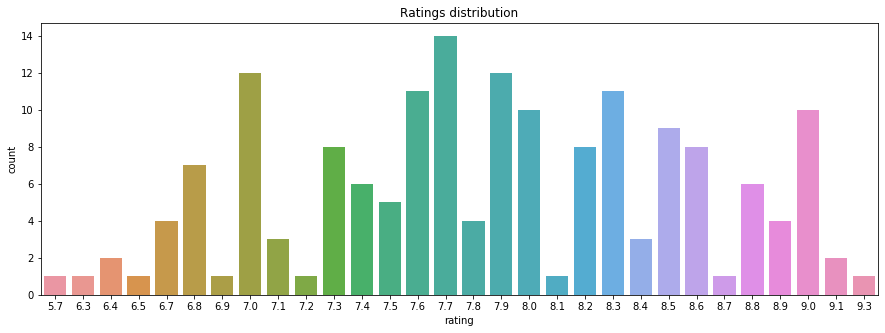

In [99]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(finaldf_rls['rating'], ax = ax)
plt.title('Ratings distribution')

<p>We can see that there are more number of restaurants with 7.4 rating and 7.9 rating. Let's see which restaurants have those ratings and which restaurants have ratings above 8.5.</p>

In [100]:
finaldf_rls[(finaldf_rls['rating'] == 7.4) | (finaldf_rls['rating'] == 7.9) | (finaldf_rls['rating'] >= 8.5)].groupby(['neighborhood']).size().sort_values(ascending = False)

neighborhood
French Quarter               13
Michoud                       6
Central Business District     5
Bywater                       5
East Riverside                4
Broadmoor                     3
Village de L'Est              3
Central City                  3
Aurora                        2
Pontchartain Park             2
Pines Village                 2
Lake Terrace/Lake Oaks        2
Black Pearl                   2
West Lake Forest              1
Faubourg Marigny              1
Dixon                         1
Garden District               1
Lake Catherine                1
Venetian Isles                1
Audubon                       1
dtype: int64

In [101]:
finaldf_rls.loc[(finaldf_rls['rating'] == 7.4) | (finaldf_rls['rating'] == 7.9) | (finaldf_rls['rating'] >= 8.5)].sort_values(by = ['rating'], ascending = False)

,neighborhood,name,categories,address,lat,lng,id,rating,number of likes
17,French Quarter,House of Blues Restaurant & Bar,Music Venue,225 Decatur St,29.953241,-90.066215,41326e00f964a5204b191fe3,9.3,1407
19,French Quarter,Restaurant R'evolution,Cajun / Creole Restaurant,777 Bienville St,29.955326,-90.068168,4faadffbe4b09ddd00780024,9.1,227
32,Central Business District,Cochon Restaurant,Southern / Soul Food Restaurant,930 Tchoupitoulas St,29.942262,-90.067249,52379d4911d223ed0eaf140e,9.1,638
51,East Riverside,Stokehold Restaurant,Restaurant,4124 Tchoupitoulas St,29.917150,-90.098276,5a28c87078782c4ee4e3d3ca,9.0,0
42,East Riverside,Atchafalaya Restaurant,Cajun / Creole Restaurant,901 Louisiana Ave,29.921237,-90.087855,4ad4c04ff964a52026f420e3,9.0,248
22,French Quarter,Katie's Restaurant & Bar,American Restaurant,3701 Iberville St,29.973001,-90.095956,4b915655f964a5203bb433e3,9.0,227
23,French Quarter,Holiday Inn Streetcar Restaurant,American Restaurant,330 Loyola Ave,29.953089,-90.075058,5391e491498e574c69abe990,9.0,0
24,French Quarter,Wolfe's Restaurant,American Restaurant,859 Convention Center Blvd,29.943312,-90.065615,4e9ef2b46da161b08dc5143d,9.0,2
25,French Quarter,River 127 Restaurant,American Restaurant,100 Iberville St,29.951361,-90.064709,4c6c315b6af58cfa7e198617,9.0,2
61,Audubon,Drago's Seafood Restaurant,Seafood Restaurant,3232 N Arnoult Rd,30.008973,-90.160624,4ad4c04ff964a5204af420e3,9.0,182


<p>We see the following factors:
    <ul>
        <li>French quarter has the greatest number of restaurants with ratings either 7.4 or 7.5 or greater than 8.4</li>
        <li>There are very few Asian restaurants with such rating requirements</li>
        <li>Though there are Asian restaurants there are no Indian restaurants</li>
        </ul></p>

<p>3. Let's see the top 10 most liked restaurants.</p>

In [102]:
finaldf_rls[['name', 'categories', 'number of likes', 'neighborhood', 'rating']].sort_values(ascending = False, by = 'number of likes')[0:10]


,name,categories,number of likes,neighborhood,rating
17,House of Blues Restaurant & Bar,Music Venue,1407,French Quarter,9.3
2,Mother's Restaurant,Cajun / Creole Restaurant,1077,French Quarter,8.0
50,Commander's Palace,Southern / Soul Food Restaurant,793,East Riverside,9.0
32,Cochon Restaurant,Southern / Soul Food Restaurant,638,Central Business District,9.1
5,Felix's Restaurant & Oyster Bar,Seafood Restaurant,478,French Quarter,8.4
7,Deanie's Seafood Restaurant in the French Quarter,American Restaurant,394,French Quarter,7.9
123,Elizabeth's,Southern / Soul Food Restaurant,354,Bywater,8.8
42,Atchafalaya Restaurant,Cajun / Creole Restaurant,248,East Riverside,9.0
13,Mulate's Cajun Restaurant,Cajun / Creole Restaurant,247,French Quarter,7.4
22,Katie's Restaurant & Bar,American Restaurant,227,French Quarter,9.0


<p>We can see that the most liked restaurant is <b>House of Blues Restaurant & Bar</b> which is mainly categorized as Music Venue!</p>

In [103]:
finaldf_rls['categories'].value_counts().sort_values(ascending = False).head(10)

Food                               29
Cajun / Creole Restaurant          27
American Restaurant                14
Chinese Restaurant                 11
Seafood Restaurant                 11
Bar                                 9
Italian Restaurant                  8
Southern / Soul Food Restaurant     7
Restaurant                          6
Mexican Restaurant                  5
Name: categories, dtype: int64

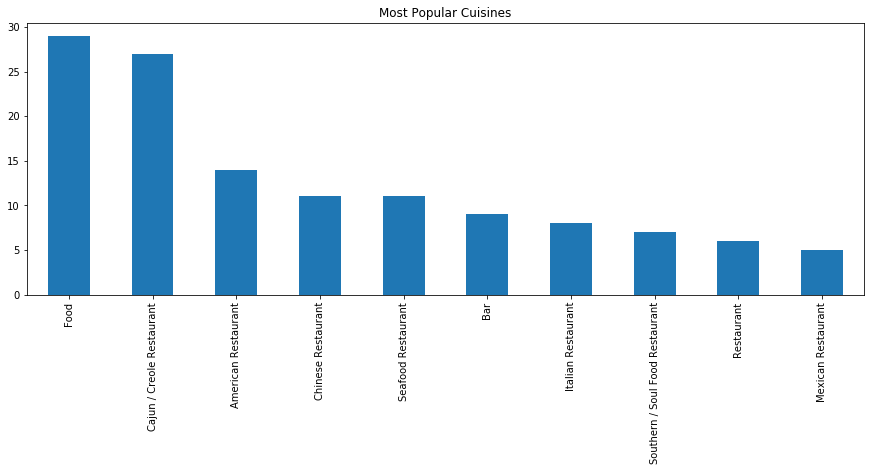

In [104]:
finaldf_rls['categories'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = (15, 5), title = 'Most Popular Cuisines')

<p>4. Top 10 neighborhoods with most likes and best ratings.</p>

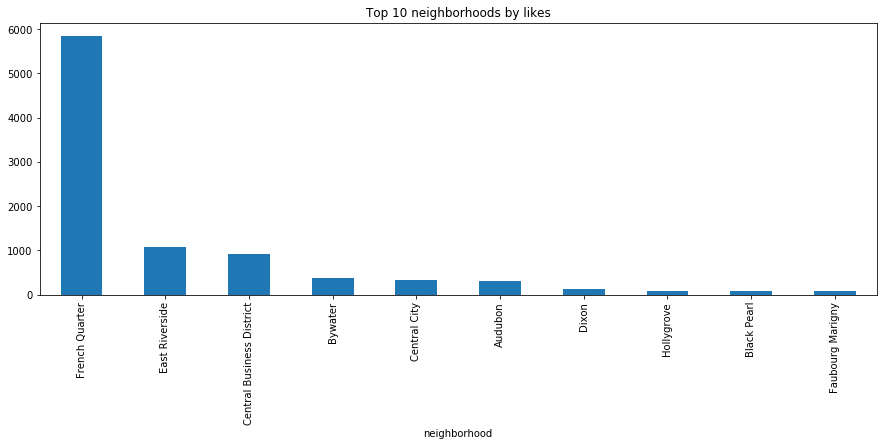

In [105]:
neigh_reviews = finaldf_rls[['neighborhood', 'rating', 'number of likes']].groupby(['neighborhood']).agg({'number of likes':'sum', 'rating': 'mean'}).sort_values(by = 'number of likes', ascending = False)

neigh_reviews['number of likes'][0:10].plot(kind = 'bar', figsize = (15, 5), title = 'Top 10 neighborhoods by likes')

<ul>Possible Restaurant Features:
        <li><b>Bar</b>: Liquor, cocktails, and Indian street food with various liquor assortments</li>
        <li><b>Music venue</b>: Live music everyday</li>
        <li><b>Indian/Cajun cuisine</b>: Since ingredients are similar in both type of cuisines, we will amalgamate these cuisines so the tourists and the locals can enjoy both at the same time.</li>
</ul>

### Methodology

#### Map of restaurants in French Quarter, CBD, and Garden District

In [106]:
nola_map = folium.Map(location = [no_latitude, no_longitude], zoom_start = 13)

for name, lat, lng in zip(finaldf_rls['name'], finaldf_rls['lat'], finaldf_rls['lng']):
    label = folium.Popup(name, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label
    ).add_to(nola_map)
    
nola_map

#### K Means Clustering

<p>K Means algorithm allows us to cluster the data as there is no label to classify the data. Using this algorithm, we can finalize where in French Quarter to begin the establishment.</p>
<p>Let us first find the best value for k using <b>silhouette coefficient</b>

#### Normalize the data

In [107]:
# one hot encoding
nola_onehot = pd.get_dummies(finaldf_rls[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nola_onehot['neighborhood'] = finaldf_rls['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nola_onehot.columns[-1]] + list(nola_onehot.columns[:-1])
nola_onehot = nola_onehot[fixed_columns]

nola_onehot.head()

,neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bar,Bed & Breakfast,Breakfast Spot,Brewery,Business Service,Cajun / Creole Restaurant,Casino,Chinese Restaurant,Coffee Shop,Diner,Distillery,Donut Shop,Food,French Restaurant,Grocery Store,Italian Restaurant,Japanese Restaurant,Kitchen Supply Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Music Venue,New American Restaurant,Pizza Place,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Southern / Soul Food Restaurant,Sports Bar,Sushi Restaurant,Tourist Information Center,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,French Quarter,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,French Quarter,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,French Quarter,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,French Quarter,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,French Quarter,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
nola_onehot.shape

(167, 40)

In [109]:
#Group the data by neighborhood by taking mean.
nola_grouped = nola_onehot.groupby('neighborhood').mean().reset_index()
nola_grouped

,neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bar,Bed & Breakfast,Breakfast Spot,Brewery,Business Service,Cajun / Creole Restaurant,Casino,Chinese Restaurant,Coffee Shop,Diner,Distillery,Donut Shop,Food,French Restaurant,Grocery Store,Italian Restaurant,Japanese Restaurant,Kitchen Supply Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Music Venue,New American Restaurant,Pizza Place,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Southern / Soul Food Restaurant,Sports Bar,Sushi Restaurant,Tourist Information Center,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Audubon,0.000000,0.000000,0.0,0.142857,0.0,0.000000,0.000000,0.0,0.285714,0.000000,0.142857,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.0,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,Aurora,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,B. W. Cooper,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,Bayou St. John,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.333333,0.0
4,Black Pearl,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.000000,0.0
5,Brechtel Park,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
6,Broadmoor,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
7,Bywater,0.000000,0.166667,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,0.0,0.000000,0.000000,0.000000,0.0
8,Central Business District,0.142857,0.000000,0.0,0.000000,0.0,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.0,0.000000,0.000000,0.000000,0.0
9,Central City,0.200000,0.000000,0.0,0.000000,0.2,0.000000,0.000000,0.0,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [110]:
nola_grouped.shape

(50, 40)

In [111]:
num_top_venues = 5

for hood in nola_grouped['neighborhood']:
    print("----"+hood+"----")
    temp = nola_grouped[nola_grouped['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Audubon----
                       venue  freq
0  Cajun / Creole Restaurant  0.29
1        Japanese Restaurant  0.14
2         Mexican Restaurant  0.14
3         Seafood Restaurant  0.14
4         Chinese Restaurant  0.14


----Aurora----
                      venue  freq
0        Chinese Restaurant   0.5
1        Seafood Restaurant   0.5
2                Restaurant   0.0
3  Mediterranean Restaurant   0.0
4        Mexican Restaurant   0.0


----B. W. Cooper----
                      venue  freq
0       American Restaurant   0.0
1                Restaurant   0.0
2  Mediterranean Restaurant   0.0
3        Mexican Restaurant   0.0
4        Miscellaneous Shop   0.0


----Bayou St. John----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.33
1             Mexican Restaurant  0.33
2      Cajun / Creole Restaurant  0.33
3            American Restaurant  0.00
4                     Restaurant  0.00


----Black Pearl----
                       venue  freq
0         

In [112]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = nola_grouped['neighborhood']

for ind in np.arange(nola_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nola_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Audubon,Cajun / Creole Restaurant,Seafood Restaurant,Mexican Restaurant,Chinese Restaurant,Japanese Restaurant
1,Aurora,Seafood Restaurant,Chinese Restaurant,Vietnamese Restaurant,Casino,French Restaurant
2,B. W. Cooper,Vietnamese Restaurant,Casino,French Restaurant,Food,Donut Shop
3,Bayou St. John,Vegetarian / Vegan Restaurant,Mexican Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,French Restaurant
4,Black Pearl,Cajun / Creole Restaurant,Sushi Restaurant,Mexican Restaurant,Casino,Food


In [113]:
from sklearn.metrics import silhouette_score

nola_grouped_cluster = nola_grouped.drop('neighborhood', 1)

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(nola_grouped_cluster)
    label = kmeans.labels_
    sil_coeff = silhouette_score(nola_grouped_cluster, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.14055426216271477
For n_clusters=3, The Silhouette Coefficient is 0.18038032017341846
For n_clusters=4, The Silhouette Coefficient is 0.21344713056098247
For n_clusters=5, The Silhouette Coefficient is 0.2520690335838379
For n_clusters=6, The Silhouette Coefficient is 0.2544756296700275
For n_clusters=7, The Silhouette Coefficient is 0.2603109961183587
For n_clusters=8, The Silhouette Coefficient is 0.2578447141468331
For n_clusters=9, The Silhouette Coefficient is 0.21577729139978602
For n_clusters=10, The Silhouette Coefficient is 0.26098587213148683


We see that for cluster k = 10, the silhouette coefficient is 0.26098587213148683, which is the maximum value of the clusters chosen.

In [114]:
# set number of clusters
kclusters = 10

nola_grouped_cluster = nola_grouped.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nola_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 4, 2, 2, 2, 8, 1, 2, 2, 2, 1, 1, 2, 4, 2, 2, 3, 0, 9, 2, 1, 5,
       0, 2, 2, 1, 2, 2, 4, 2, 1, 2, 1, 1, 1, 7, 1, 1, 4, 1, 6, 8, 4, 1,
       0, 1, 2, 1, 5, 2], dtype=int32)

In [115]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted

,Cluster Labels,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,Audubon,Cajun / Creole Restaurant,Seafood Restaurant,Mexican Restaurant,Chinese Restaurant,Japanese Restaurant
1,4,Aurora,Seafood Restaurant,Chinese Restaurant,Vietnamese Restaurant,Casino,French Restaurant
2,2,B. W. Cooper,Vietnamese Restaurant,Casino,French Restaurant,Food,Donut Shop
3,2,Bayou St. John,Vegetarian / Vegan Restaurant,Mexican Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,French Restaurant
4,2,Black Pearl,Cajun / Creole Restaurant,Sushi Restaurant,Mexican Restaurant,Casino,Food
5,8,Brechtel Park,Chinese Restaurant,Restaurant,Vietnamese Restaurant,Casino,French Restaurant
6,1,Broadmoor,Food,Vietnamese Restaurant,Casino,French Restaurant,Donut Shop
7,2,Bywater,Food,Cajun / Creole Restaurant,Asian Restaurant,Southern / Soul Food Restaurant,Coffee Shop
8,2,Central Business District,American Restaurant,French Restaurant,Southern / Soul Food Restaurant,Diner,Brewery
9,2,Central City,Cajun / Creole Restaurant,American Restaurant,Kitchen Supply Store,Bed & Breakfast,Chinese Restaurant


In [116]:
nola_merged = finaldf_rls

# merge nola_grouped with finaldf_rls to add latitude/longitude for each neighborhood
nola_merged = nola_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')

nola_merged.head()

,neighborhood,name,categories,address,lat,lng,id,rating,number of likes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,French Quarter,Pere Antoine Restaurant,Cajun / Creole Restaurant,741 Royal St,29.958819,-90.064059,4aeb3cf3f964a520f7bf21e3,6.3,130,2,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
1,French Quarter,French Market Restaurant & Bar,Seafood Restaurant,1001 Decatur St,29.959330,-90.060780,4ad4c050f964a5208ef420e3,7.7,156,2,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
2,French Quarter,Mother's Restaurant,Cajun / Creole Restaurant,401 Poydras St,29.948835,-90.066902,4aed9d64f964a520dbcd21e3,8.0,1077,2,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
3,French Quarter,Antoine's Restaurant,Cajun / Creole Restaurant,713 Saint Louis St,29.956724,-90.066409,4ad4c04df964a5206ff320e3,8.0,219,2,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
4,French Quarter,The Old Coffeepot Restaurant,Breakfast Spot,714 Saint Peter St,29.958185,-90.065222,4ad4c04df964a52061f320e3,6.4,82,2,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant


In [117]:
nola_merged.isna().sum()

neighborhood              0
name                      0
categories                3
address                  12
lat                       0
lng                       0
id                        0
rating                    0
number of likes           0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
dtype: int64

In [118]:
nola_merged['Cluster Labels'].value_counts().to_frame()

,Cluster Labels
2,102
1,40
4,10
0,6
8,3
5,2
9,1
7,1
6,1
3,1


<p>We see that cluster label 2 has the highest value. Let's examine the cluster 2 further, after visualizing the clusters.</p>

#### Visualizing clusters

In [119]:
# create map
nola_clusters = folium.Map(location=[no_latitude, no_longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, hood, cluster in zip(nola_merged['lat'], nola_merged['lng'], nola_merged['neighborhood'], nola_merged['Cluster Labels']):
    label = folium.Popup(str(hood) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(nola_clusters)
       
nola_clusters

<b>Cluster 2</b>

In [120]:
nola_merged.loc[nola_merged['Cluster Labels'] == 2, nola_merged.columns[[0] + list(range(10, nola_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,French Quarter,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
1,French Quarter,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
2,French Quarter,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
3,French Quarter,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
4,French Quarter,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
5,French Quarter,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
6,French Quarter,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
7,French Quarter,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
8,French Quarter,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant
9,French Quarter,Cajun / Creole Restaurant,American Restaurant,Seafood Restaurant,Bar,Italian Restaurant


In [121]:
nola_merged[nola_merged['Cluster Labels'] == 2].groupby(['neighborhood']).size().sort_values(ascending = False)

neighborhood
French Quarter               30
East Riverside               10
Audubon                       7
Central Business District     7
Bywater                       6
Dixon                         6
McDonogh                      5
Gentilly Woods                5
Central City                  5
Bayou St. John                3
Lake Terrace/Lake Oaks        3
Black Pearl                   3
Village de L'Est              3
West Riverside                2
Lake Catherine                2
Fairgrounds                   2
Gert Town                     1
Lakewood                      1
B. W. Cooper                  1
dtype: int64

<p>Since French Quarter has 30 restaurants that fall under cluster 2, we can conclude that our restaurant can be opened in <b>French Quarter</b>.</p>

### Final Conclusion

<p><ul>Restaurant Features:
        <li><b>Bar</b>: Liquor, cocktails, and Indian street food with various liquor assortments</li>
        <li><b>Music venue</b>: Live music everyday</li>
        <li><b>Indian/Cajun cuisine</b>: Since ingredients are similar in both type of cuisines, we will amalgamate these cuisines so the tourists and the locals can enjoy both at the same time.</li>
</ul></p>

<p><b>Opening location:</b></p> French Quarter